In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic (1).csv


In [15]:
df = pd.read_csv("/content/Titanic.csv")

In [16]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include="all"))


Shape of dataset: (418, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Na

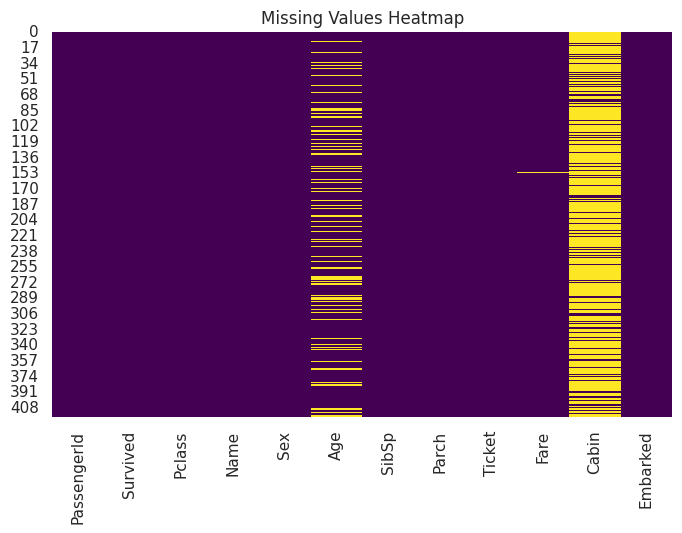

In [17]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

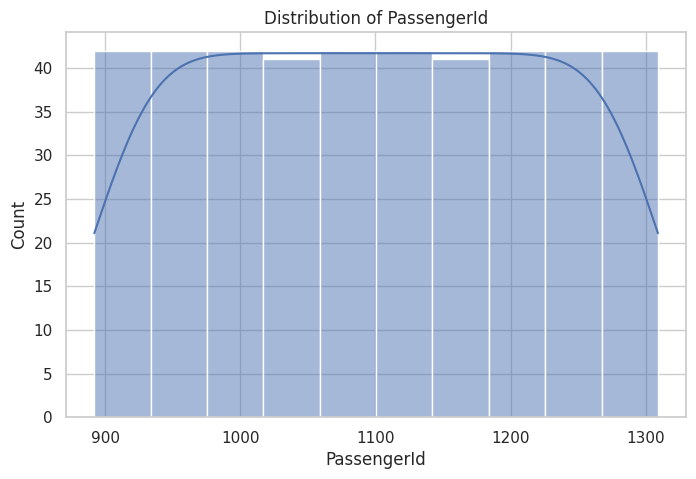

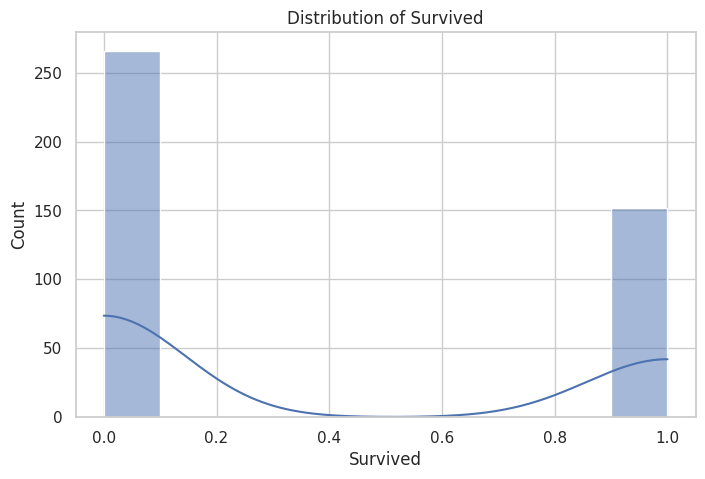

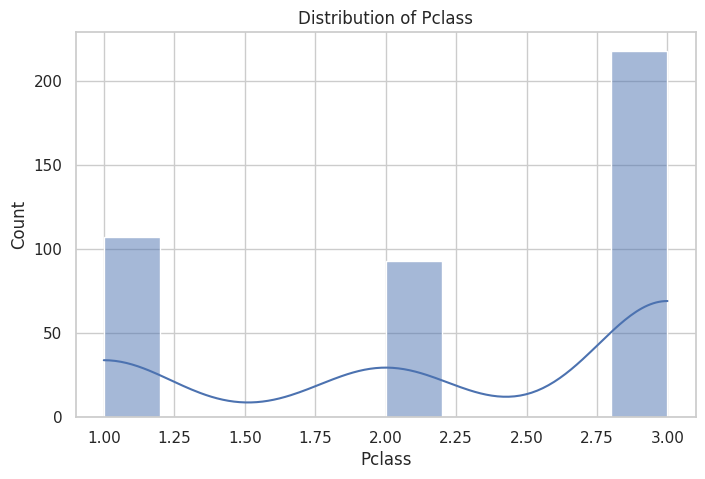

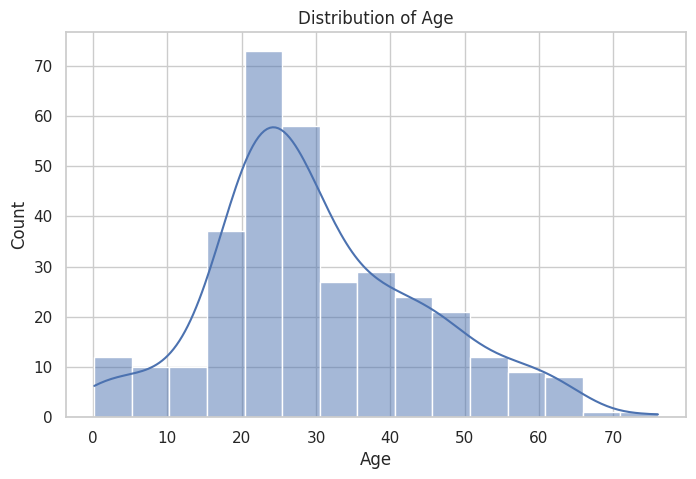

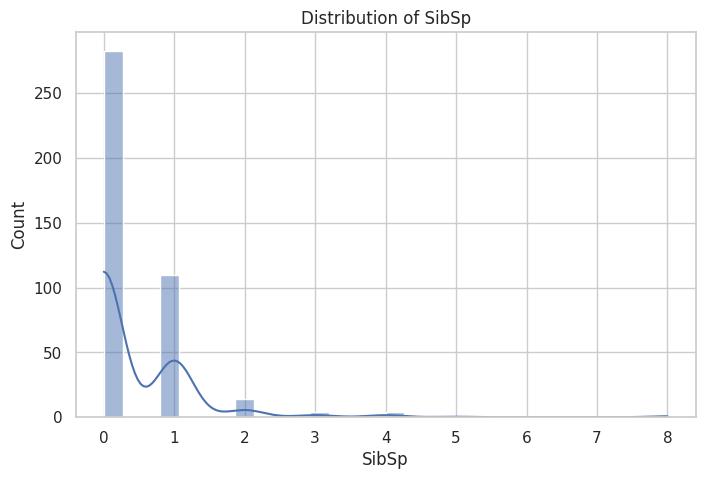

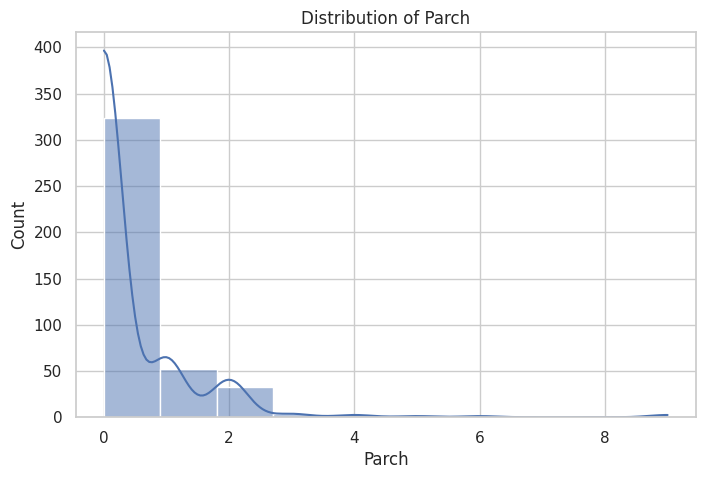

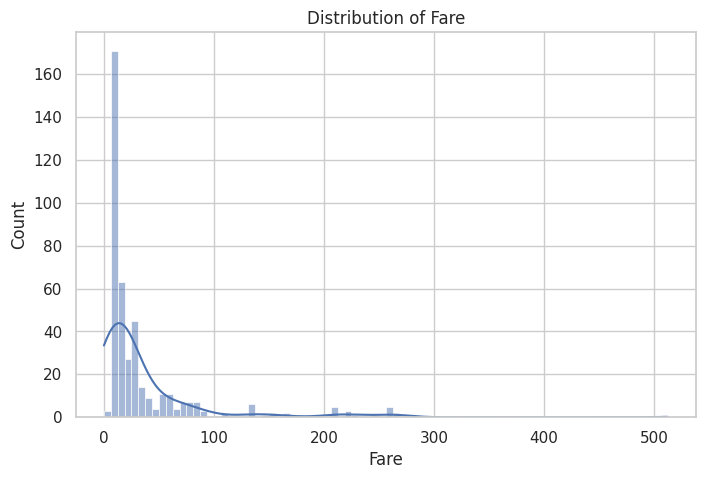

In [18]:
for col in df.select_dtypes(include=np.number).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

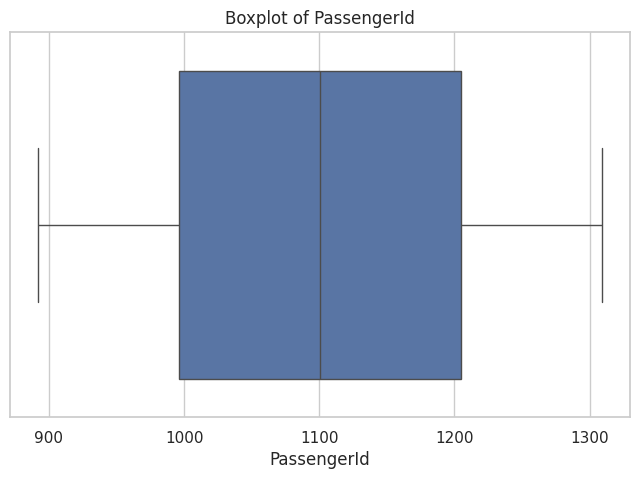

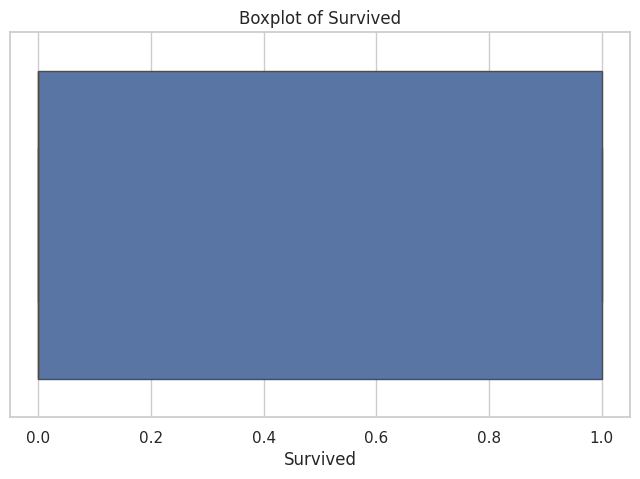

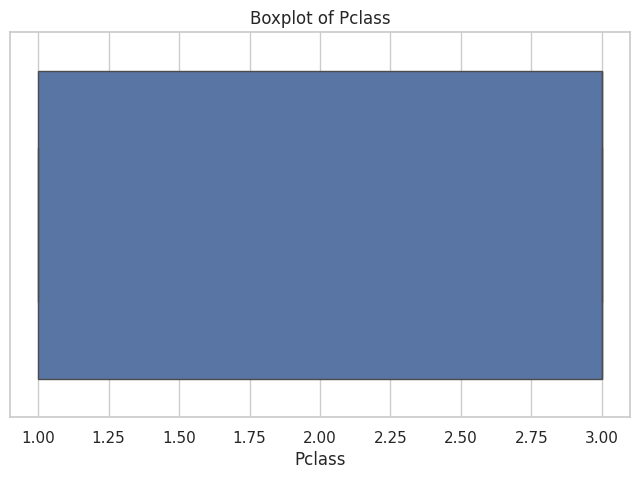

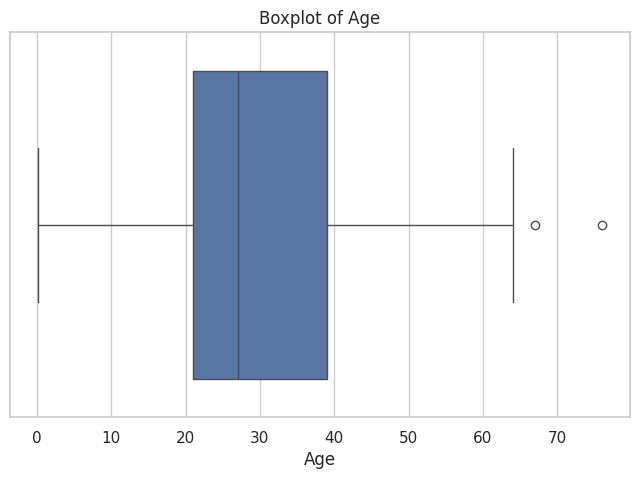

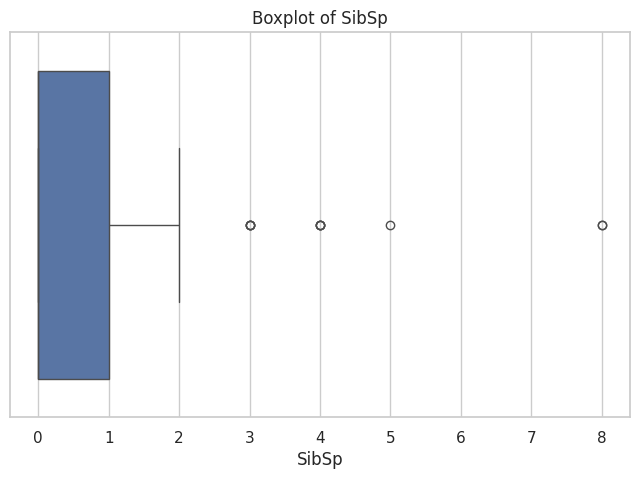

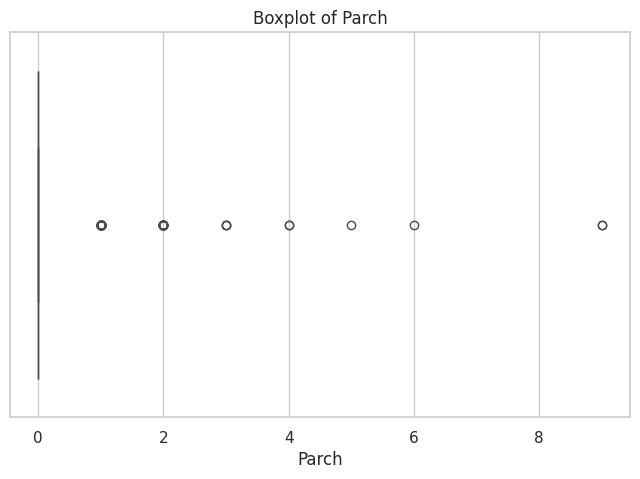

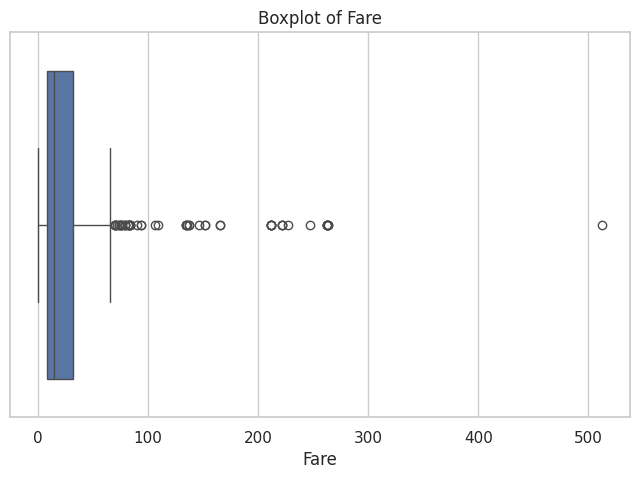

In [19]:
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

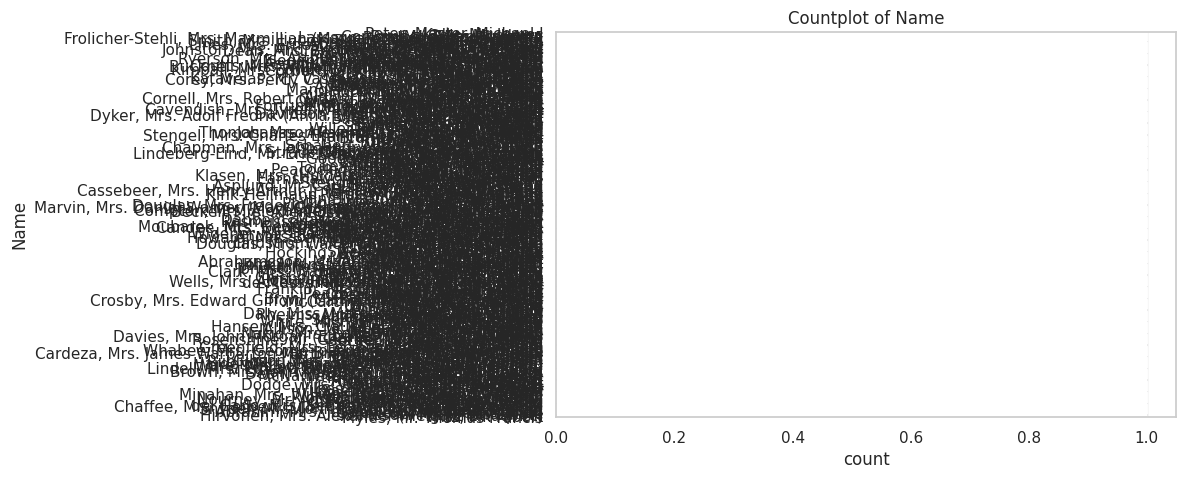

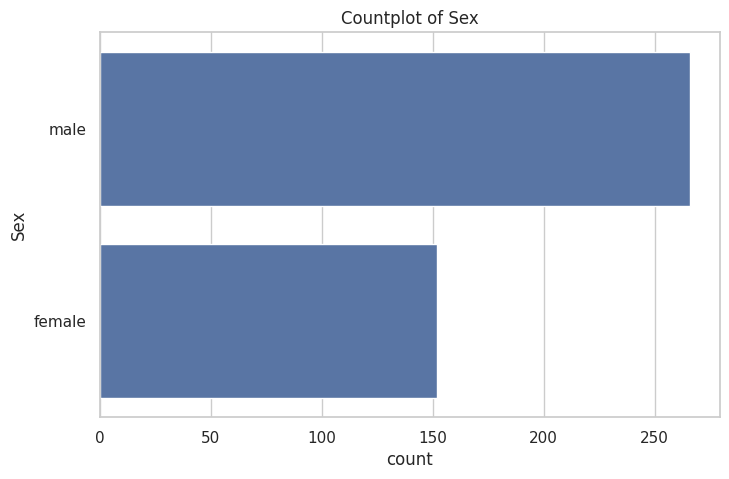

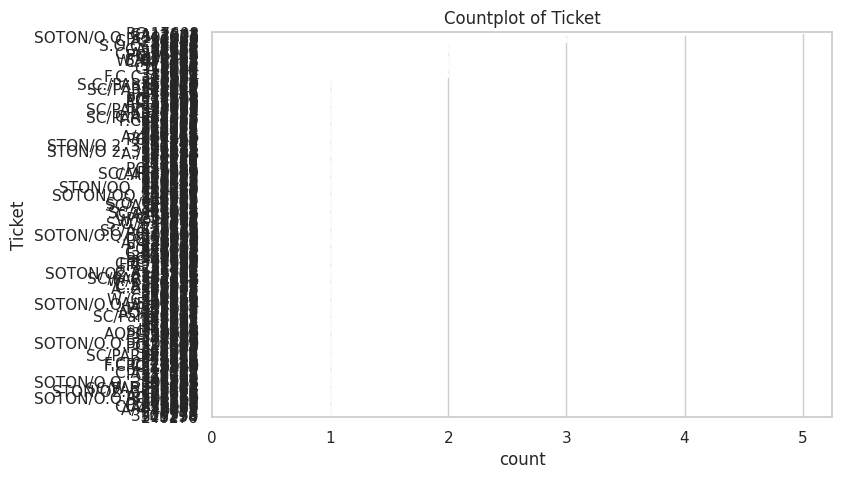

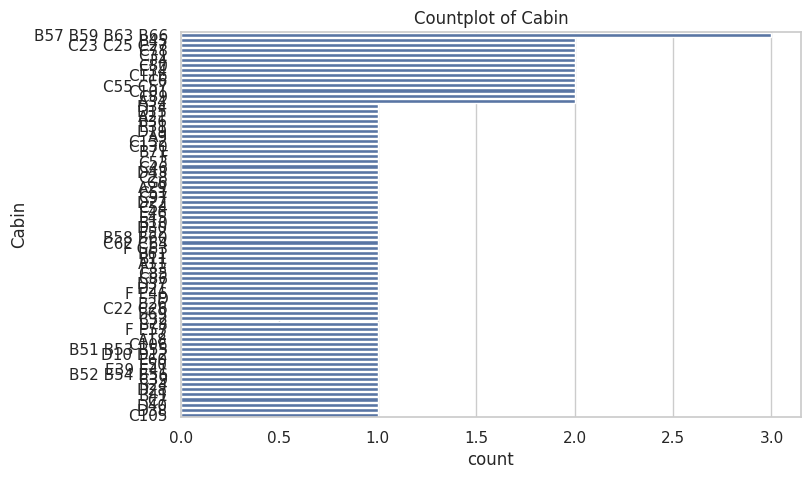

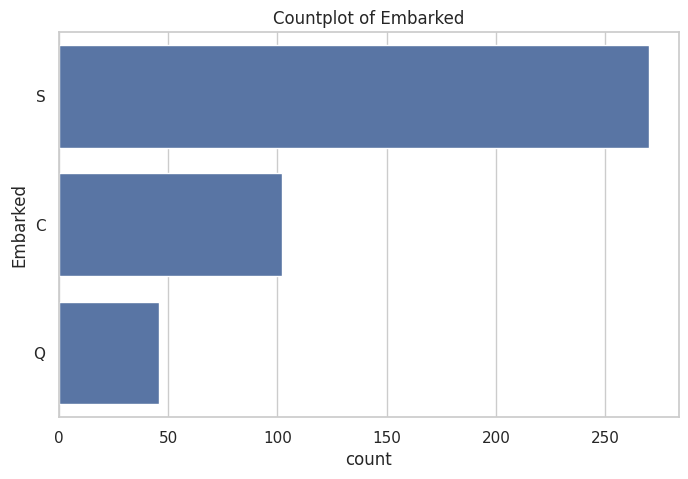

In [20]:
for col in df.select_dtypes(include="object").columns:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()

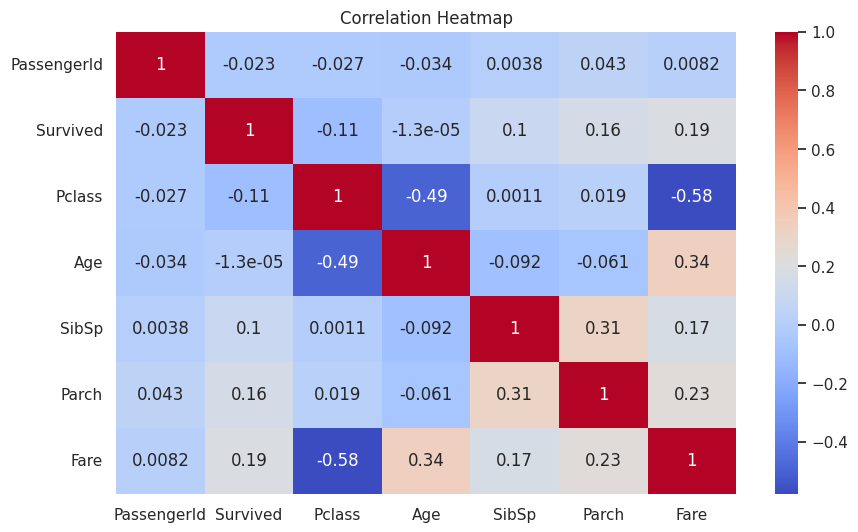

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

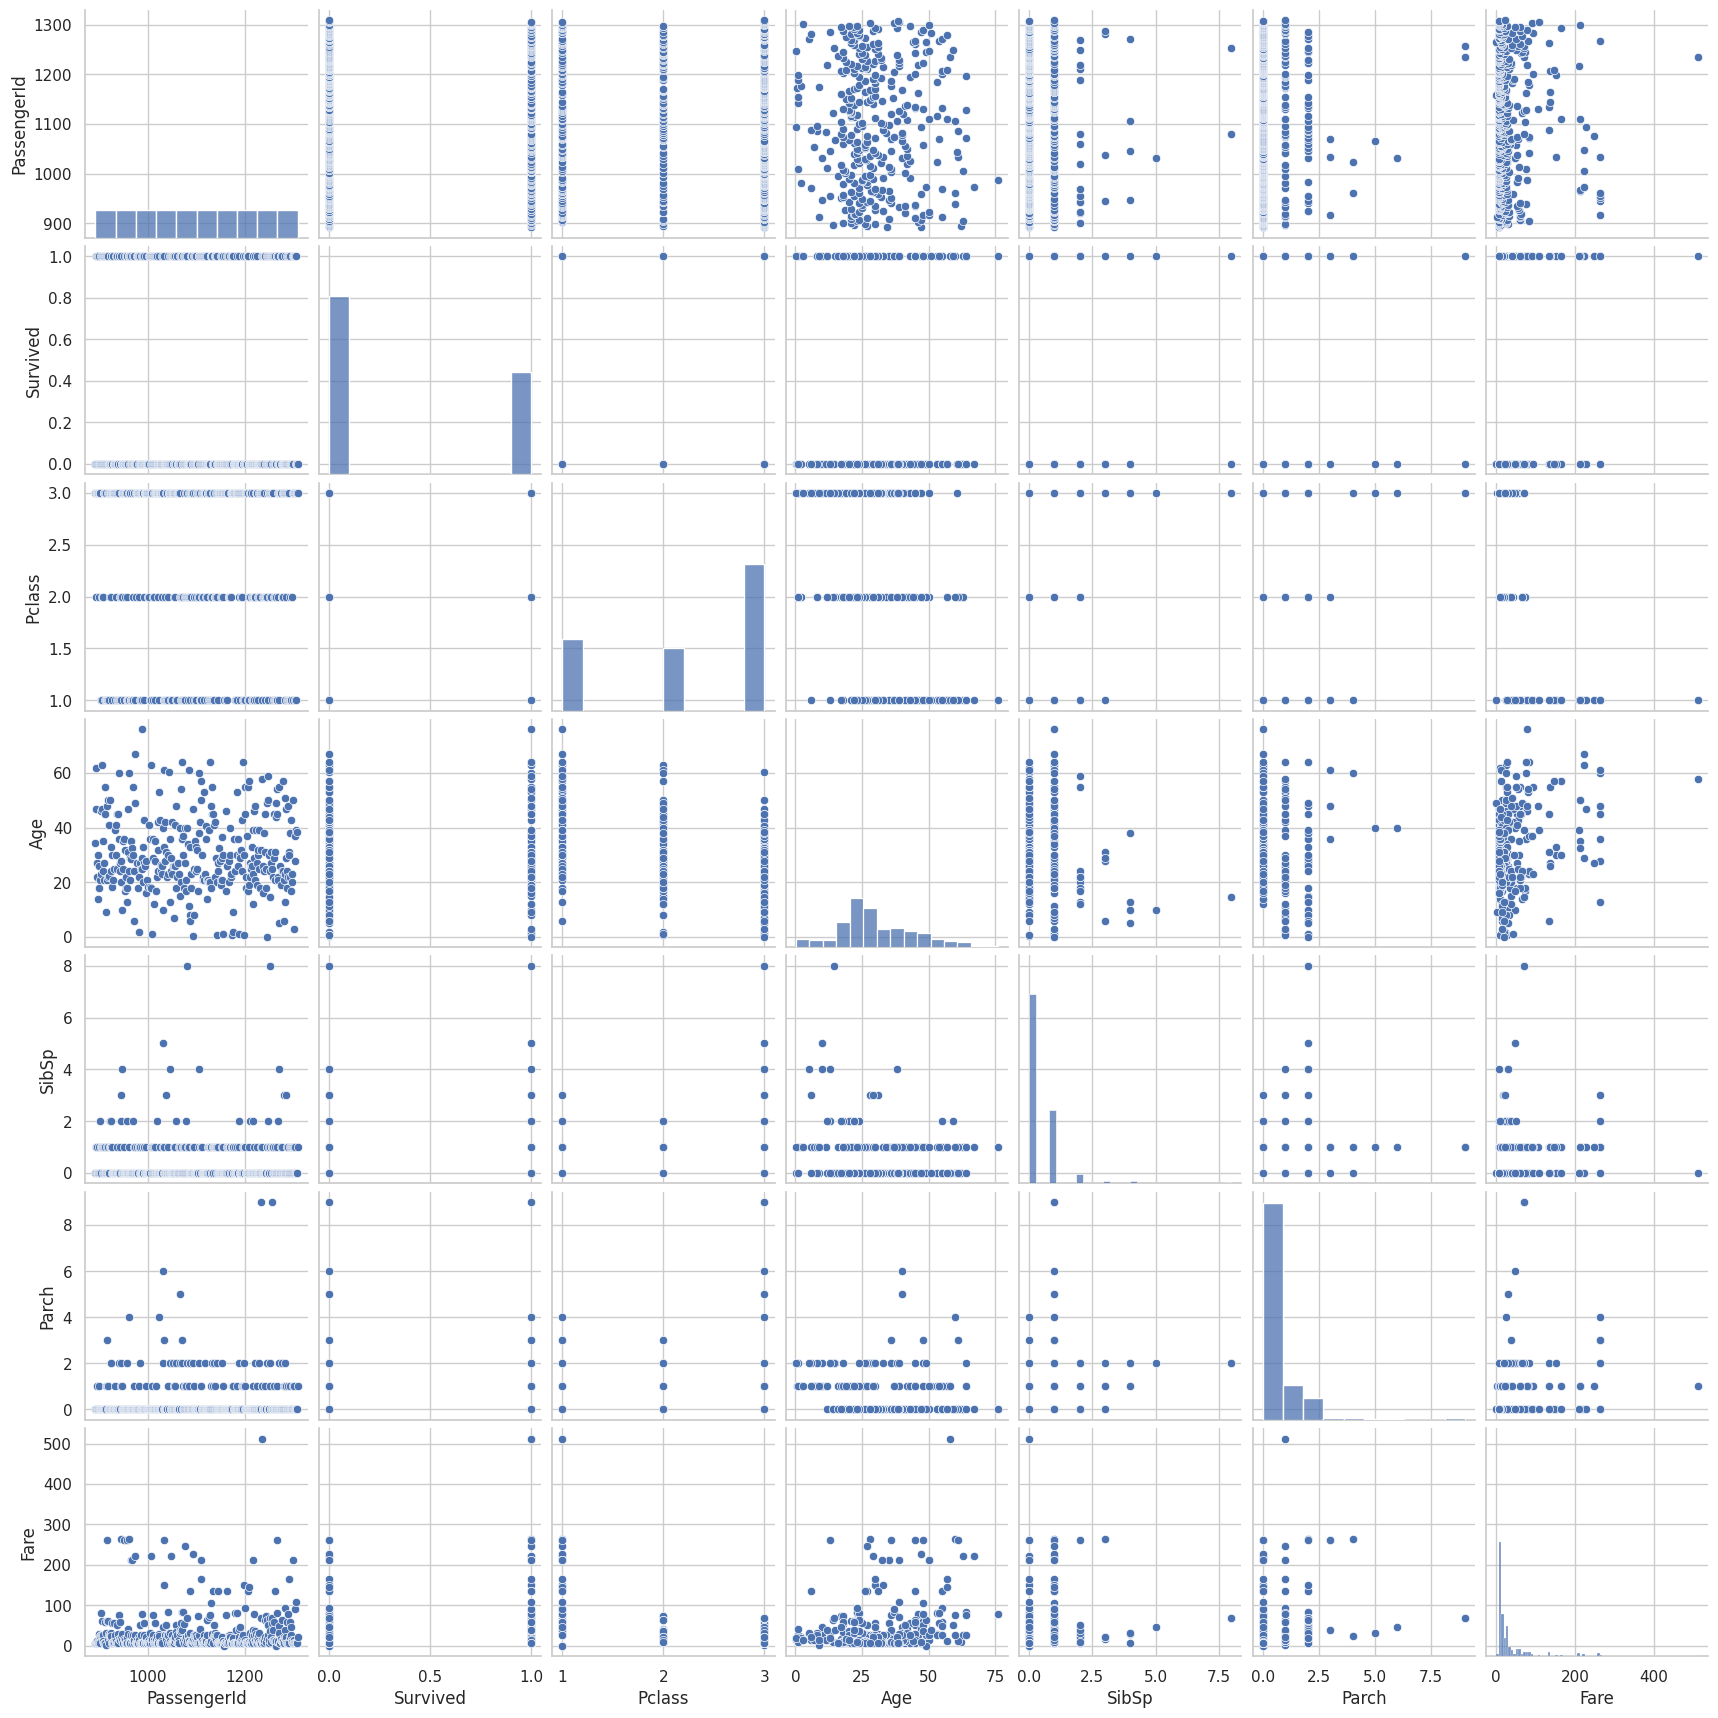

In [24]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

In [25]:
if 'CategoryColumn' in df.columns and 'NumericColumn' in df.columns:
    print(df.groupby('CategoryColumn')['NumericColumn'].mean())


PassengerId Skewness: 0.0


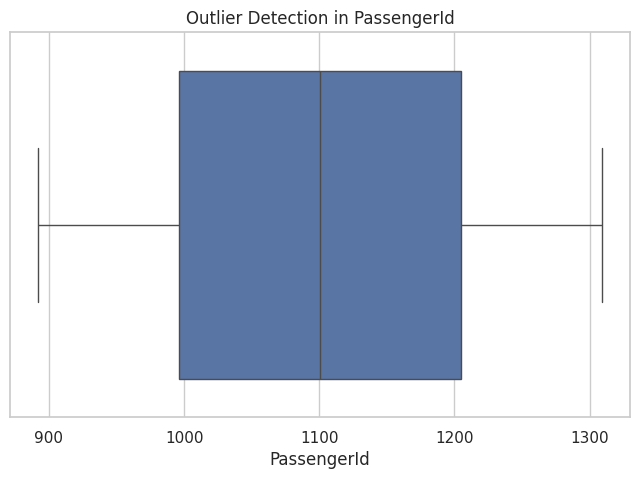

Survived Skewness: 0.5689905804746247


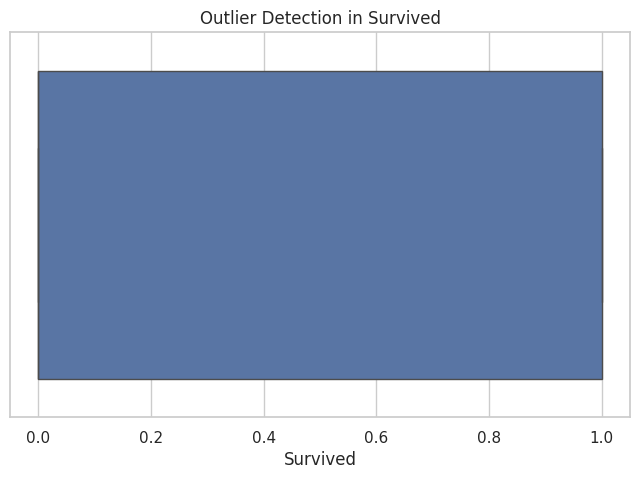

Pclass Skewness: -0.5341703482345055


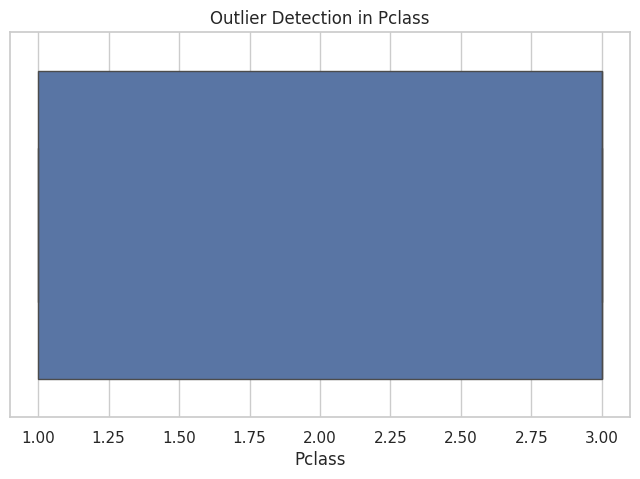

Age Skewness: 0.4573612871503845


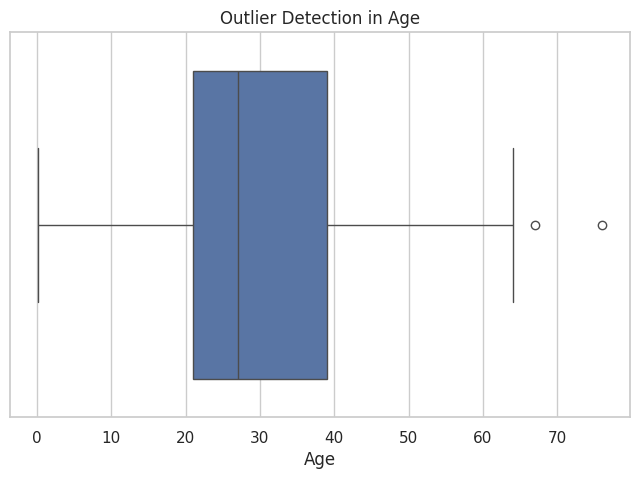

SibSp Skewness: 4.168336568562722


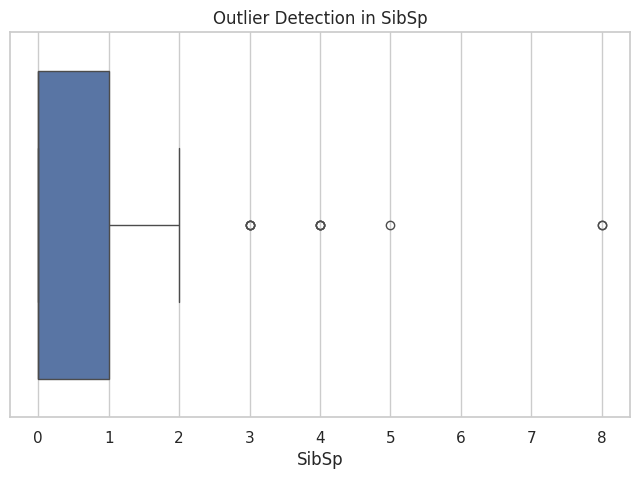

Parch Skewness: 4.654461698299236


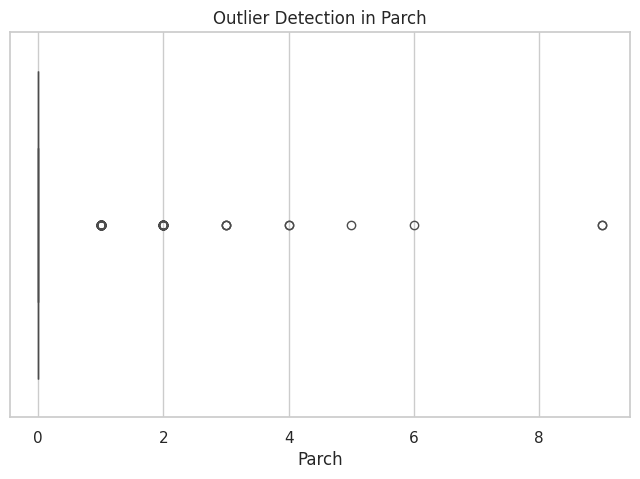

Fare Skewness: 3.6872133081121405


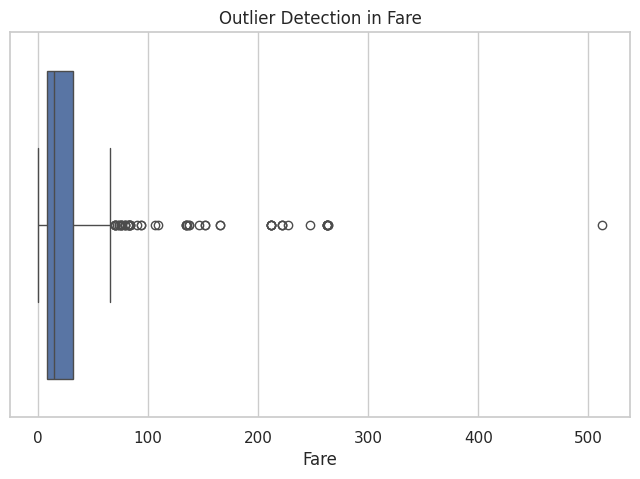

In [26]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col} Skewness: {df[col].skew()}")
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection in {col}")
    plt.show()

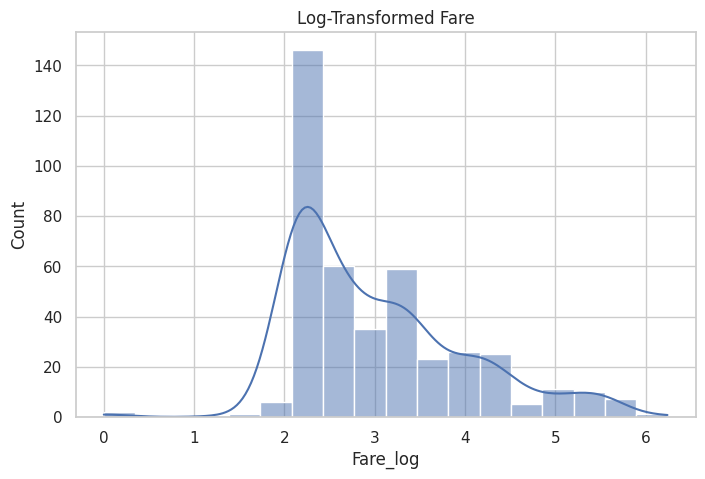

In [27]:
if abs(df[col].skew()) > 1:
        df[f"{col}_log"] = np.log1p(df[col])
        sns.histplot(df[f"{col}_log"], kde=True)
        plt.title(f"Log-Transformed {col}")
        plt.show()

In [28]:
df.to_csv("processed_dataset.csv", index=False)